In [ ]:
# 针对 训练集

In [9]:
# 读取文件
import pandas as pd

filename = "../data/train_set.csv"
train_df = pd.read_csv(filename, encoding="ANSI")

In [10]:
# 显示前五行
train_df.head()

,label,text
0,6,武汉 一座 英雄 城市 曾 一起 并肩作战 真是 倍感 荣光 舍小家 大家 守 一城护 一...
1,10,中新社 广州 6 月 12 日电 记者 许 青青 合富 辉煌 中国 商业地产 合富 研究院...
2,7,文化 过大年 云上 更 精彩 查干湖 19 届 冰雪 渔猎 文化 旅游节 上 来自 全国 ...
3,9,今早 类魂 游戏 致命 躯壳 官方 正式 宣布 本作 现已 正式 售出 超过 50 万份 ...
4,7,促进 区域 协调 发展 路径分析 我国 拥有 14 亿 人口 发展 中 大国 区域 发展 ...


In [11]:
# 简单显示文本长度
train_df['text_len'] = train_df['text'].apply(lambda x: len(str(x).split(' ')))
train_df['text_len'].describe()

count    14534.000000
mean       395.600523
std        293.685739
min          9.000000
25%        205.000000
50%        312.000000
75%        486.000000
max       2704.000000
Name: text_len, dtype: float64

Text(0.5, 1.0, 'Histogram of char count')

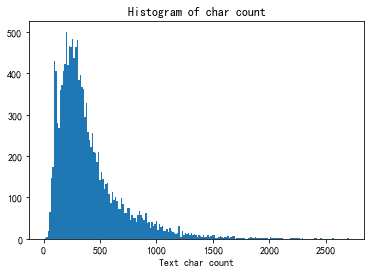

In [12]:
# 绘制分布图
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

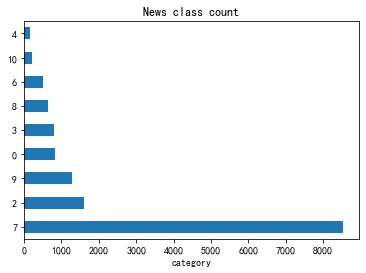

In [13]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

train_df['label'].value_counts().plot(kind='barh')
plt.title('News class count')
plt.xlabel("category")

In [15]:
# 统计词频
from collections import Counter
all_lines = ' '.join(str(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0:10])


221
[('', 558), ('.', 33), ('1', 17), ('\n', 11), ('3', 9), ('4', 9), ('2', 8), ('5', 8), ('日', 6), ('0', 5)]
('c', 1)


In [16]:
# 词袋

from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(str(x).split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
print(word_count[1])
print(word_count[2])
print(word_count[3])
print(word_count[4])
print(word_count[5])

('', 14534)
('月', 11946)
('年', 9544)
('日', 9341)
('上', 8215)
('日电', 7918)


In [18]:
# Count Vectors + RidgeClassifier
# 词袋 + 特征值提取
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('../data/train_set.csv',encoding='ANSI')

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'].values.astype('U'))

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])

print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
print(type(val_pred))

# 0.10343472451465849
# 0.10357460616527975 
# 一定要打乱训练的顺序
# 0.8491012463815872
# 0.8207100395680607

0.8207100395680607
<class 'numpy.ndarray'>


In [20]:
# 朴素贝叶斯
# TF-IDF +  RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('../data/train_set.csv', encoding="ANSI")

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.10658403152377673
# 0.10661056926117167
# 0.8404218282357144
# 0.8602994126998214

0.8602994126998214
